## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import nltk
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [2]:
df=pd.read_csv("movies.csv")

In [3]:
df.head(1)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,9575.225,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,258000000.0,116.0,Released,You can't run from your past.,7.305,845.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/vJU3rXSP9hwUuLeq8IpfsJShLOk.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...


## Feature Engineering

In [4]:
df.drop(["keywords","popularity","budget","revenue","runtime","status","tagline","backdrop_path","recommendations"],axis=1,inplace=True)

In [5]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

In [6]:
df.reset_index(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216842 entries, 0 to 722921
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    216842 non-null  int64  
 1   title                 216842 non-null  object 
 2   genres                216842 non-null  object 
 3   original_language     216842 non-null  object 
 4   overview              216842 non-null  object 
 5   production_companies  216842 non-null  object 
 6   release_date          216842 non-null  object 
 7   vote_average          216842 non-null  float64
 8   vote_count            216842 non-null  float64
 9   credits               216842 non-null  object 
 10  poster_path           216842 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 19.9+ MB


In [8]:
df=df.dropna(subset=['poster_path'])
df=df.dropna(subset=['genres'])
df=df.dropna(subset=['release_date'])
df=df.dropna(subset=['title'])
df=df.dropna(subset=['credits'])
df=df.dropna(subset=['production_companies'])
df=df.dropna(subset=['overview'])
df["genres"]=df["genres"].str.split("-")

In [11]:
df=df.reset_index()

In [10]:
df.drop(0,inplace=True)

In [12]:
df["production_companies"]=df["production_companies"].str.split("-")
df["release_date"]=df["release_date"].str.split("-")
df["credits"]=df["credits"].str.split("-")

In [133]:
df["release_date"]=df["release_date"].apply(lambda x:x[0])

In [134]:
df["credits"]=df["credits"].apply(lambda x:x[0:3])

In [16]:
df.drop(["index"],axis=1,inplace=True)

In [135]:
df["vote_average"]=round(df["vote_average"],1)

In [136]:
df["vote_count"]=df["vote_count"].astype(int)

In [137]:
df["poster_path"]=df["poster_path"].apply(lambda x:"https://image.tmdb.org/t/p/w600_and_h900_bestv2"+x)

In [150]:
df2=df.loc[:29999]

In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 30000 non-null  int64  
 1   id                    30000 non-null  int64  
 2   title                 30000 non-null  object 
 3   genres                30000 non-null  object 
 4   original_language     30000 non-null  object 
 5   overview              30000 non-null  object 
 6   production_companies  30000 non-null  object 
 7   release_date          30000 non-null  object 
 8   vote_average          30000 non-null  float64
 9   vote_count            30000 non-null  int32  
 10  credits               30000 non-null  object 
 11  poster_path           30000 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 2.6+ MB


## Data Analysis

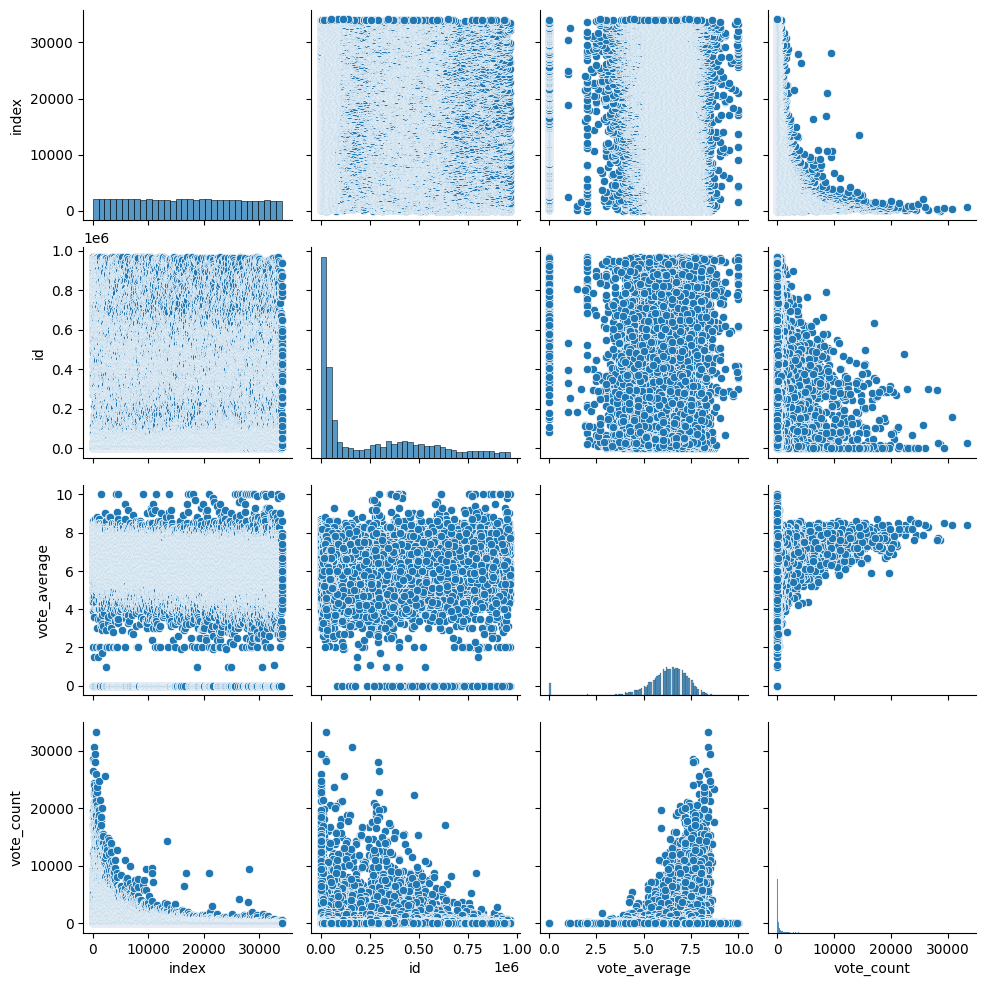

In [159]:
sns.pairplot(df2)
plt.show()

In [161]:
df2["original_language"].value_counts().index[:4]

Index(['en', 'fr', 'ja', 'es'], dtype='object')

In [162]:
language_labels=["English","French","Japanese","Spanish"]

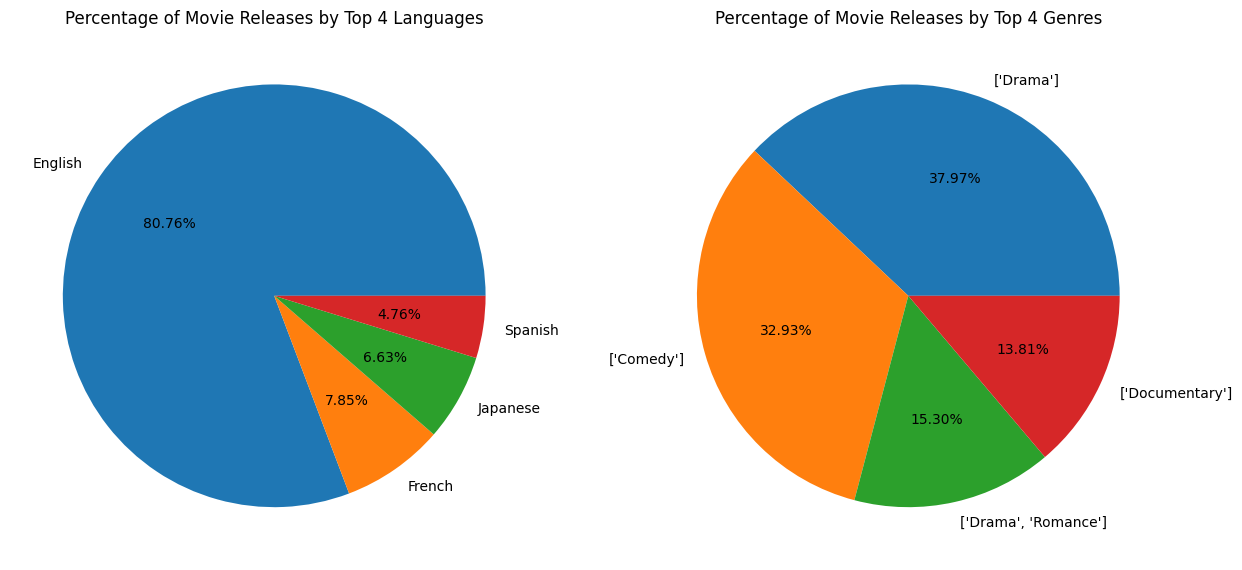

In [163]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].pie(df2["original_language"].value_counts().values[:4],labels=language_labels,autopct="%.02f%%")
axs[0].set_title("Percentage of Movie Releases by Top 4 Languages")

axs[1].pie(df2["genres"].value_counts().values[:4],labels=df2["genres"].value_counts().index[:4],autopct="%.02f%%")
axs[1].set_title("Percentage of Movie Releases by Top 4 Genres")
plt.show()

In [164]:
top_movies=df2[["title","vote_count","vote_average"]].sort_values(by=["vote_count","vote_average"],ascending=False)[:10]

In [165]:
top_movies

,title,vote_count,vote_average
625,Inception,33262,8.4
249,Interstellar,30708,8.4
417,The Dark Knight,29330,8.5
39,Avatar,28557,7.6
181,The Avengers,28260,7.7
367,Deadpool,28061,7.6
89,Avengers: Infinity War,26445,8.3
610,Fight Club,25956,8.4
1982,Guardians of the Galaxy,25586,7.9
1052,Pulp Fiction,24744,8.5


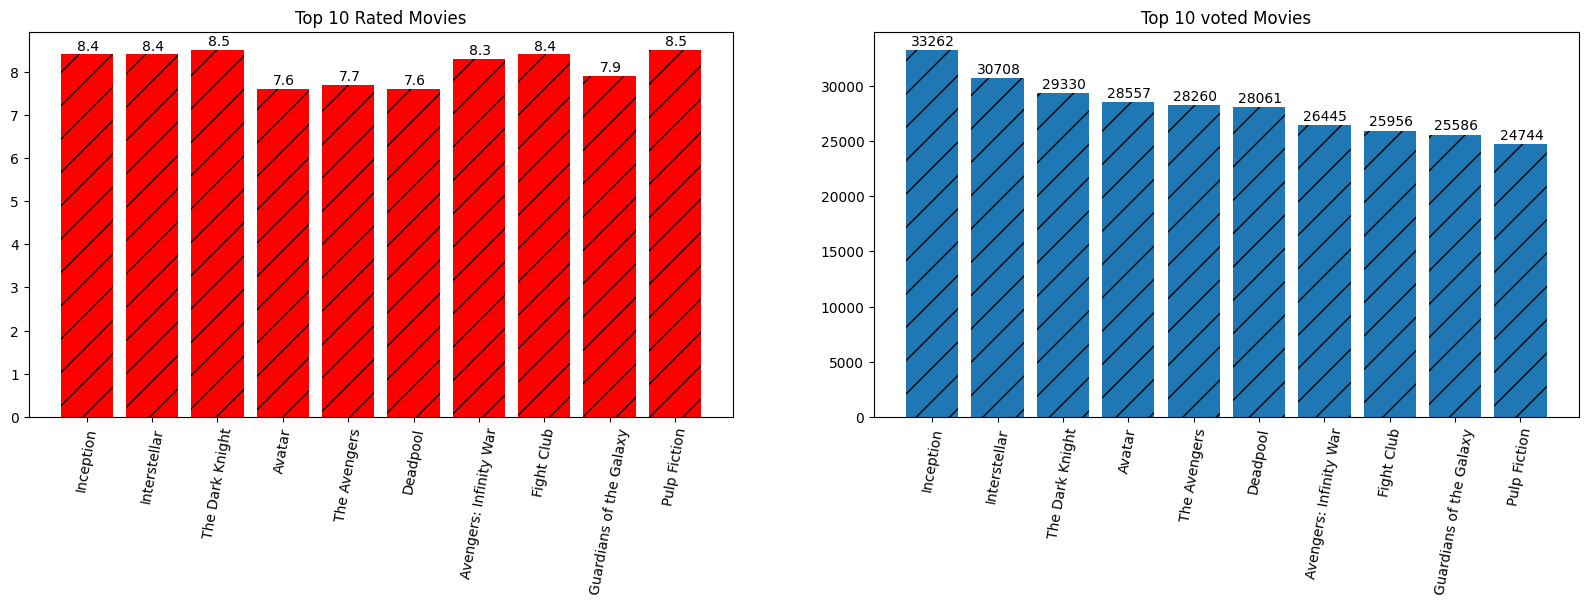

In [166]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
x_axis=list(range(1,len(top_movies["title"])+1))

axs[0].bar(x_axis,top_movies["vote_average"],hatch="/",color="red")
axs[0].set_title("Top 10 Rated Movies")
axs[0].set_xticks(x_axis, top_movies["title"], rotation = 80)

for index,value in enumerate(top_movies["vote_average"],start=1):
    axs[0].text(index-0.15,value+0.1,"{}".format(value))
    

axs[1].bar(x_axis,top_movies["vote_count"],hatch="/")
axs[1].set_title("Top 10 voted Movies")
axs[1].set_xticks(x_axis, top_movies["title"], rotation = 80)

for index,value in enumerate(top_movies["vote_count"],start=1):
    axs[1].text(index-0.32,value+450,"{}".format(value))
plt.show()

## Creating Final Column for deploy Recommendation

In [167]:
df2["genres"]=df2["genres"].apply(lambda x:" ".join(x))
df2["production_companies"]=df2["production_companies"].apply(lambda x:" ".join(x))
df2["credits"]=df2["credits"].apply(lambda x:" ".join(x))

C:\Users\purne\AppData\Local\Temp\ipykernel_16720\3036206205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["genres"]=df2["genres"].apply(lambda x:" ".join(x))
C:\Users\purne\AppData\Local\Temp\ipykernel_16720\3036206205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["production_companies"]=df2["production_companies"].apply(lambda x:" ".join(x))
C:\Users\purne\AppData\Local\Temp\ipykernel_16720\3036206205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [170]:
df2["tags"]=df2["genres"]+" "+df2["production_companies"]+" "+df2["credits"]+" "+df2["overview"]

C:\Users\purne\AppData\Local\Temp\ipykernel_16720\1474189304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["tags"]=df2["genres"]+" "+df2["production_companies"]+" "+df2["credits"]+" "+df2["overview"]


In [172]:
df2_backup=df2.copy()

In [173]:
df2.drop(["genres","production_companies","credits","overview"],axis=1,inplace=True)

C:\Users\purne\AppData\Local\Temp\ipykernel_16720\2216031178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["genres","production_companies","credits","overview"],axis=1,inplace=True)


In [174]:
df2.head(1)

,index,id,title,original_language,release_date,vote_average,vote_count,poster_path,tags
0,1,76600,Avatar: The Way of Water,en,2022,7.8,6748,https://image.tmdb.org/t/p/w600_and_h900_bestv2/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,Science Fiction Adventure Action 20th Century Studios Lightstorm Entertainment Sam Worthington Zoe Saldaña Sigourney Weaver Set more than a decade after the events of the first film learn the story of the Sully family (Jake Neytiri and their kids) the trouble that follows them the lengths they go to keep each other safe the battles they fight to stay alive and the tragedies they endure.


In [83]:
ps=PorterStemmer()

In [89]:
def transform_msg(a):
    y=[]
    a=a.lower()
    a=nltk.word_tokenize(a)
    
    for i in a:
        if i.isalnum():
            y.append(i)
    a=y
    b=[]
    for i in a:
        if i not in stopwords.words("english"):
            b.append(i)
    a=b
    c=[]
    for i in a:
        c.append(ps.stem(i))
        
    return" ".join(c)

In [175]:
df2["tags"]=df2["tags"].apply(transform_msg)

C:\Users\purne\AppData\Local\Temp\ipykernel_16720\2858648170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["tags"]=df2["tags"].apply(transform_msg)


## Top Words used in Movie Tags

In [176]:
wc=WordCloud(height=500,width=500)

In [178]:
top_words=wc.generate(df2["tags"].str.cat(sep=" "))

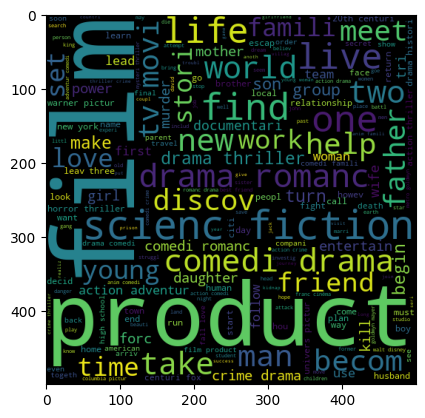

In [179]:
plt.imshow(top_words)
plt.show()

## Convert Categorical column to Vector

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=5000)

In [181]:
vector=cv.fit_transform(df2["tags"]).toarray()

In [182]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [183]:
vector.shape

(30000, 5000)

In [184]:
c_similarity= cosine_similarity(vector)

In [187]:
c_similarity.shape

(30000, 30000)

## Final Model

In [221]:
def recommend(movie):
    movie_index= df2[df2["title"]== movie].index[0]
    angle_distance= sorted(list(enumerate(c_similarity[movie_index])),reverse=True,key = lambda x: x[1])
    
    for i in angle_distance[1:11]:
        print(df2.loc[i[0]]["title"])  

In [214]:
df2[df2["title"]=="O.S.S. 117: Mission to Tokyo"].index[0]

29998

## Testing

In [229]:
recommend("Spider-Man: No Way Home")

Peter's To-Do List
Spider-Man: Far From Home
Spider-Man: Beyond the Spider-Verse
Spider-Man: Homecoming
Venom: Let There Be Carnage
Spider-Man: Into the Spider-Verse
Transformers: Dark of the Moon
Transformers: Rise of the Beasts
The Matrix Resurrections
Kraven the Hunter


In [230]:
import pickle

In [260]:
pickle.dump(df2.to_dict(),open("moive_to_dict.pkl","wb"))

In [236]:
pickle.dump(c_similarity,open("similarity,pkl","wb"))